In [1]:
import pandas as pd

capstone_df = pd.read_csv(r"C:\Users\Haw Yuan Xin\Desktop\HeicodersAcademy\Ai300\CapstoneProject\Casptonedata.csv")
capstone_df

,account_id,tenure_months,tenure_months.1,num_referrals,contract_type,total_monthly_fee,total_charges_quarter,total_refunds,gender,age,num_dependents,status,city,population
0,NFEJ-WVYXF,4,4,0,Month-to-Month,73.90,280.85,0.0,Male,50,0,Churned,Costa Mesa,62069
1,BFIN-DLMOA,3,3,3,Month-to-Month,83.90,267.40,0.0,Female,75,0,Churned,Camarillo,42853
2,AFEO-XOOCP,63,63,8,Two Year,84.65,5377.80,0.0,Male,52,0,Stayed,Napa,63947
3,DEMQ-MFXWC,65,65,3,Two Year,90.45,5957.90,0.0,Female,43,1,Stayed,Sheridan,1219
4,AIPP-VTDXJ,72,72,0,Two Year,101.30,7261.25,0.0,Female,32,0,Stayed,La Mesa,24005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LNRH-QIIVJ,41,41,0,Month-to-Month,45.20,1841.90,0.0,Female,58,3,Stayed,Stinson Beach,781
996,GCDO-LCNJJ,47,47,5,Two Year,21.30,1041.80,0.0,Female,47,3,Stayed,Palmdale,34045
997,HROY-CKUQC,25,25,1,Month-to-Month,34.00,853.00,0.0,Female,19,0,Churned,San Diego,30206
998,KDVC-VZBAI,40,40,5,One Year,80.80,3132.75,0.0,Male,46,0,Stayed,Guadalupe,5726


In [2]:
capstone_df.columns

Index(['account_id', 'tenure_months', 'tenure_months.1', 'num_referrals',
       'contract_type', 'total_monthly_fee', 'total_charges_quarter',
       'total_refunds', 'gender', 'age', 'num_dependents', 'status', 'city',
       'population'],
      dtype='object')

In [3]:
capstone_df.isna().sum()

account_id               0
tenure_months            0
tenure_months.1          0
num_referrals            0
contract_type            0
total_monthly_fee        0
total_charges_quarter    0
total_refunds            0
gender                   0
age                      0
num_dependents           0
status                   0
city                     0
population               0
dtype: int64

In [4]:
# Convert status to numerical values (Churned = 1, Stayed = 0)
capstone_df['status'] = capstone_df['status'].apply(lambda x: 1 if x == 'Churned' else 0)

# Encode categorical features (One-Hot Encoding)
capstone_df = pd.get_dummies(capstone_df, columns=['contract_type', 'gender'], drop_first=True)

#capstone_df['status']

In [5]:
import matplotlib.pyplot as plt

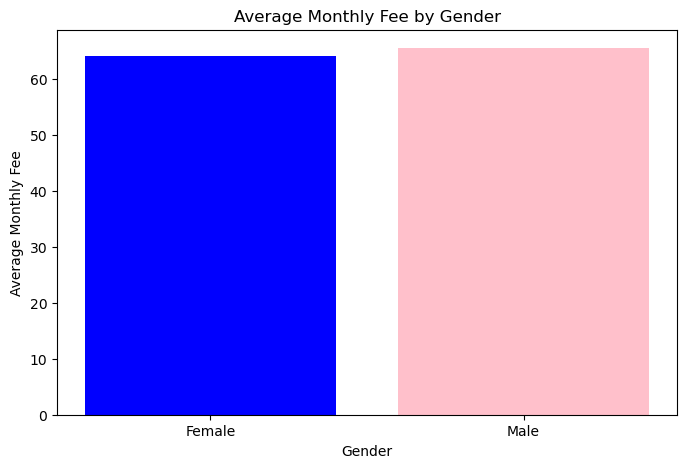

In [6]:
# Calculate the average monthly fee by gender
average_fee_by_gender = capstone_df.groupby('gender_Male')['total_monthly_fee'].mean()

# Map the boolean values back to "Male" and "Female"
gender_labels = ['Female', 'Male']
average_fee_by_gender.index = gender_labels

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(
    average_fee_by_gender.index, average_fee_by_gender.values, color=['blue', 'pink']
)
plt.title('Average Monthly Fee by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Fee')
plt.show()

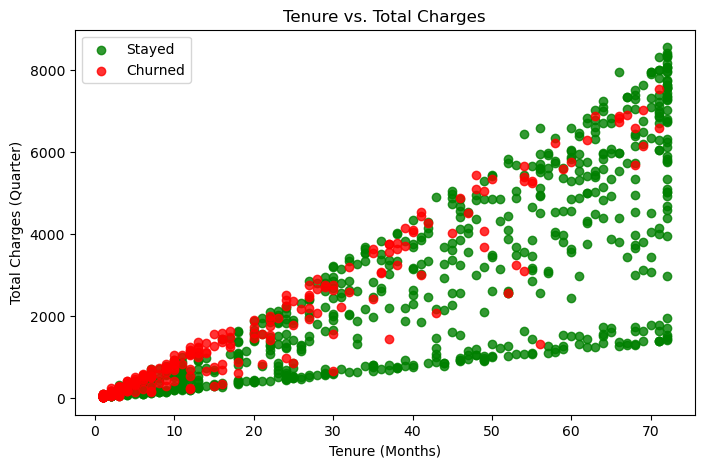

In [7]:
# Scatter plot: Tenure vs. Total Charges with color based on status

plt.figure(figsize=(8, 5))

colors = {0: 'green', 1: 'red'}
labels = {0: 'Stayed', 1: 'Churned'}

for status, group in capstone_df.groupby('status'):
    plt.scatter(
        group['tenure_months'], group['total_charges_quarter'], 
                c=colors[status], label=labels[status], alpha=0.8
    )

plt.title('Tenure vs. Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges (Quarter)')
plt.legend(loc='upper left')
plt.show()


In [8]:
print(capstone_df['status'].unique())

[1 0]


In [9]:
#!pip install xgboost

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = capstone_df.drop(columns=['account_id', 'status', 'city'])
y = capstone_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8706


C:\Users\Haw Yuan Xin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
#!pip install catboost

In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = capstone_df.drop(columns=['account_id', 'status', 'city'])
y = capstone_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

y_pred_cat = catboost_model.predict_proba(X_test)[:, 1]

auc_score_cat = roc_auc_score(y_test, y_pred_cat)
print(f"CatBoost AUC Score: {auc_score_cat:.4f}")

CatBoost AUC Score: 0.8928


In [13]:
#print(capstone_df.columns)